In [62]:
# This is the exercise 2 for lecture01
# of the 'Data Science' class at TH Rosenheim
# (c) Markus Breunig

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## I. Data Driven Decision Making

Consider the story of Signet Bank. At the time, credit cards essentially had uniform pricing. Modeling the probability of default had changed the industry (customers where either offered a credit card, if their probability of default was low enough, or not). Around 1990, two strategic visionaries (Richard Fairbanks and Nigel Morris) realized that information technology was powerful enough that they could do more sophisticated predictive modeling and offer different terms (nowadays: pricing, credit limits, low-initial-rate balance transfers, cash back, loyalty points, and so on) to different customers. Signet Bank’s management was convinced that modeling profitability, not just default probability, was the right strategy. They knew that a small proportion of customers actually account for more than 100% of a bank’s profit from credit card operations (because the rest are break-even or money-losing). If they could model profitability, they could make better offers to the best customers and “skim the cream” of the big banks’ clientele.

But Signet Bank had one really big problem in implementing this strategy. They did not have the appropriate data to model profitability with the goal of offering different terms to different customers. No one did. Since banks were offering credit with a specific set of terms and a specific default model, they had the data to model profitability (1) for the terms they actually have offered in the past, and (2) for the sort of customer who was actually offered credit (that is, those who were deemed worthy of credit by the existing model).

What could Signet Bank do? They brought into play a fundamental strategy of data science: acquire the necessary data at a cost. Once we view data as a business asset, we should think about whether and how much we are willing to invest. In Signet’s case, data could be generated on the profitability of customers given different credit terms by conducting experiments. Different terms were offered at random to different customers. This may seem foolish outside the context of data-analytic thinking: you’re likely to lose money! This is true. In this case, losses are the cost of data acquisition. The data- analytic thinker needs to consider whether she expects the data to have sufficient value to justify the investment.

So what happened with Signet Bank? As you might expect, when Signet began randomly offering terms to customers for data acquisition, the number of bad accounts soared. Signet went from an industry-leading “charge-off ” rate (2.9% of balances went unpaid) to almost 6% charge-offs. Losses continued for a few years while the data scientists worked to build predictive models from the data, evaluate them, and deploy them to improve profit. Because the firm viewed these losses as investments in data, they persisted despite complaints from stakeholders. Eventually, Signet’s credit card operation turned around and became so profitable that it was spun off to separate it from the bank’s other operations, which now were overshadowing the consumer credit success.

Fairbanks and Morris became Chairman and CEO and President and COO, and proceeded to apply data science principles throughout the business — not just customer acquisition but retention as well. When a customer calls looking for a better offer, data-driven models calculate the potential profitability of various possible actions (different offers, including sticking with the status quo), and the customer service representative’s computer presents the best offers to make.

You may not have heard of little Signet Bank, but you may have heard of the spin-off: Capital One. Fairbanks and Morris’s new company grew to be one of the largest credit card issuers in the industry with one of the lowest charge-off rates. In 2000, the bank was reported to be carrying out 45,000 of these “scientific tests” as they called them.
(Example taken from Provost/Fawcett: Data Science for Business, ISBN 978-1449361327)

### Exercise I.1

Fairbanks and Morris did apply DDDM in the above example. Recall that DDDM usually follows this five-step approach:
1. Formulate Vision and Hypothesis
2. Find, Collect, Organize Data
3. Perform Data Analysis
4. Draw Conclusions and Strategize
5. Measure Success and Iterate

What did Fairbanks/Morris do exactly in each of these steps?

# ----- YOUR SOLUTION HERE -----

1. Vision:      more profit
   Hypothesis:  more profit customers get personal and better offers
2. offer random terms to different people, store data on accepted and denied previous offers, store data on results of new random offers
3. view stored data and determine what gives more profit, what should be avoided
4. adapt terms and conditions, depending on given data, such that max profit is achieved
5. measure charge-off rate and aim for lower


## II. Descriptive – Diagnostic – Predictive – Prescriptive Data Analytics

### Exercise II.1
For each of the four kinds of Data Anlytics, state which questions they answer.

# ----- YOUR SOLUTION HERE -----

1. Descriptive  - it shows the information in the underlying data in a different/better way. visualization
2. Diagnostic   - it analyzes the data, its correlation and possible causation.
3. Predictive   - it tells what is likely to happen in the real world, based on the model/data
4. Prestrictive - it says what the user/company should do, reacting to the prediction, such that some goal is achieved (eg max profit)

## III. CRISP-DM

### Exercise III.1
List the six phases of the CRISP-DM process in order.

# ----- YOUR SOLUTION HERE -----

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

## IV. Linearity in Space and Time

When working on a data science project, we often iterate in our Notebooks. This means, we go back a few cells, change something and rerun the following cells. Thus, cells are on one hand executed multiple times and on the other hand, the Notebook is not linear in time anymore. We can always make it linear in space and time by using the "Kernel -> Restart Kernel and Run All Cells" command - but we do not want to do this too frequently, as it is pretty slow (esp. if there is some expensive data preprocessing earlier in the notebook). We can, however, ensure linearity in time by coding carefully!

### Idempotent cells
One way to ensure linearity, is to make cells idempotent. This means that they do not change the state even when executed multiple times.

In [64]:
# example for an idempotent cell: all of the following lines are idempotent
# you can easily verify this by executing the cell multiple times
# (e.g. by pressing ctrl-return multiple times)
a = 10
b = a + 10
a = max(b, 100)
print(f'a={a}, b={b}')

a=100, b=20


In [65]:
# example for a cell, that is not idempotent. Again, verify by executing multiple times.
a = b + 10
b = a + 10
print(f'a={a}, b={b}')

a=30, b=40


Quite often (but not always), it is possible to write idempotent code instead of non-idempotent code. You want to get into the habit of coding as many cells idempotent as possible. 

#### Exercise IV.1

Given a list of data values, containt three outliers:

In [66]:

my_data

[1020, 1025, 1035, 1098, 1102]

The following code removes these outliers:

In [67]:
my_data.sort()
my_data = my_data[2:len(my_data)-2]
my_data

[1035]

The above code is not idempotent. Write a cell that removes the three outliers but is idempotent!

In [68]:
# ----- YOUR SOLUTION HERE -----
my_data = [1, 1000, 1020, 1102, 8888, 1098, 1025, 1035, 8889]
my_data.sort()
my_data = my_data[2:len(my_data)-2]
my_data

[1020, 1025, 1035, 1098, 1102]

### Re-runnable code

Regardless of whether cells are idempotent, your code should be re-runnable. This means that if you run all cells once, than go back and change something, than run all cells from the changed cell onwards, you get exactely the same result as if you restarted the kernel and run all cells. 

#### Exercise IV.2

The following cells #1, #2, #3 are not re-runnable (even though, for the given data, they are idempotent):

In [69]:
# load data - do not change this cell (assume this is your original dataset)
y = [1001, 1000, 1020, 1102, 1200, 1098, 1025, 1035, 1198, 1044, 1024]
x = range(0, len(y))

In [70]:
# assume you are doing a bunch of stuff here, which you do NOT want to rerun as it
# is very expensive/time consuming
import matplotlib.pyplot as plt

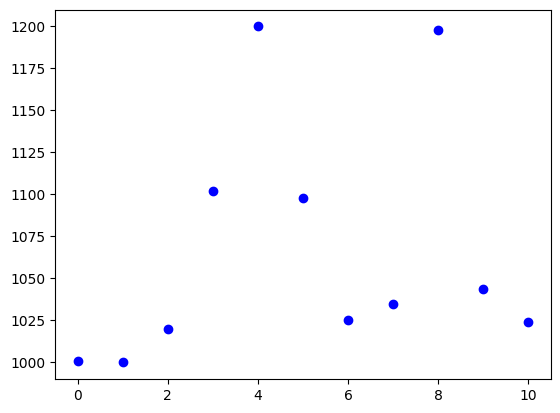

In [71]:
# cell #1
# run the cells once, then go back to this one and trying changing this to red crosses ('rx' instead of 'bo')
_=plt.plot(x, y, 'bo') 

In [72]:
# cell #2
y = [value * 3 if value < 2000 else value for value in y]

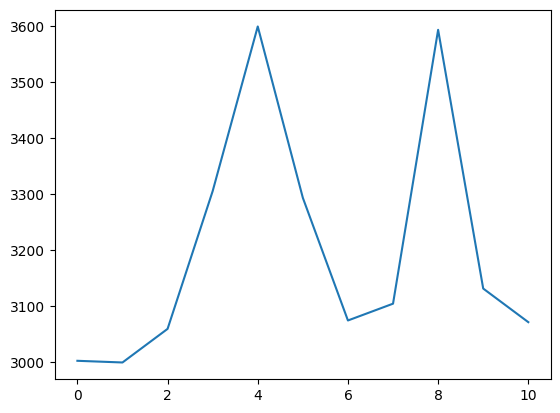

In [73]:
# cell #3
_=plt.plot(x, y)

Re-write these cells to make them re-runnable.

In [74]:
# load data - do not change this cell (assume this is your original dataset)
y = [1001, 1000, 1020, 1102, 1200, 1098, 1025, 1035, 1198, 1044, 1024]
x = range(0, len(y))

In [75]:
# assume you are doing a bunch of stuff here, which you do NOT want to rerun as it
# is very expensive/time consuming

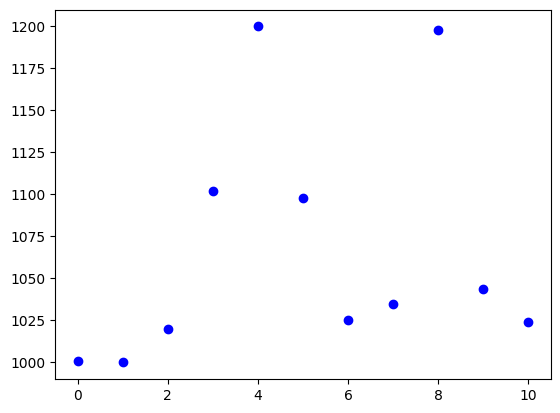

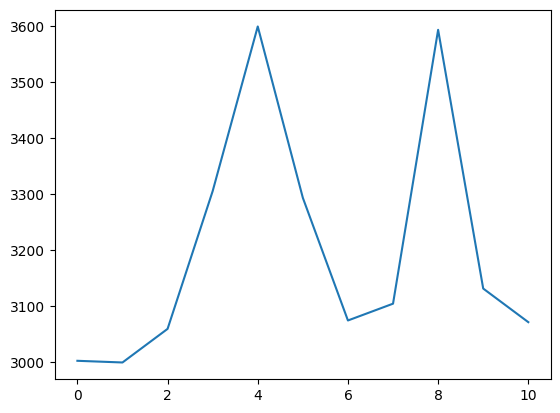

In [79]:
# ----- YOUR SOLUTION HERE -----
_=plt.plot(x, y, 'bo') 
plt.show()

y3 = [value * 3 if value < 2000 else value for value in y]
_=plt.plot(x, y3)
plt.show()

---